# Projeto 1 | Pedro Villela Ball | 1B #

In [62]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import math as math
from scipy import stats
import matplotlib.pyplot as plt

print(os.getcwd())

C:\Users\Pedro Ball\Documents\ciência dos dados\Projeto_1


# Perguntas:

1) Como eram as condições econômicas dos países na URSS ? Seus países se beneficiavam desse grupo de forma igualitátia ?

2) A situação economica desses países era justificavel e/ou condizente com os outros países vizinhos ?

3) Depois da quebra do grupo, como ficou a economia dos países membros ? A quebra teve algum impacto nos países vizinhos ?

4) Qual foi o comportamento populacional desses países durante e depois da URSS ? Teve algo haver com a situação econômica desses países ?

# Hipóteses:

1) Os países sovieticos, provavelmente, tinham uma condição econômica de baixa qualidade, onde países líderes como a Russia usufruiam da maioria dos recursos do grupo.

2) É provavel que os países vizinhos da URSS tiveram melhores condições econômicas, mesmo fazendo parte da mesma região.

3) Depois da quebra da URSS, é provavel que grande parte dos países membros entraram em declínio economicamente (devido a dependência na russia). E é provavel que depois da quebra, os países vizinhos tiveram um aumento na economia por exportarem produtos aos antigos membros da URSS.

4) Provavelmente os países membros tiveram um crescimento populacional baixo, tendo uma queda brusca durante a Segunda Guerra Mundial, mas depois apresentando um alto crescimento depois da quebra da URSS. Isso pode ter sua explicação na situação econômica e social desses países.

In [63]:
divida = pd.read_excel("external_debt.xlsx")
importados = pd.read_excel("imports.xlsx")
renda_capita = pd.read_excel("gdp_per_capita.xlsx")
IDH = pd.read_excel("HDI.xlsx")
setor_servicos = pd.read_excel("service.xlsx")
crescimento_populacional = pd.read_excel("population_growth.xlsx")
WordBank = pd.read_excel('WorldBank-Copy1.xlsx')

1) Começamos chamando as tabelas de dados que seram usadas por meio de variáveis, como visto acima

In [64]:
renda_capita.head()

,GDP per capita,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
4,Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,...,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0


In [65]:
renda_capita_index = renda_capita.set_index("GDP per capita")
paises_GDP = renda_capita_index.loc[["Armenia", "Azerbaijan", "Belarus", "Estonia", "Georgia", "Kazakhstan", "Kyrgyz Republic", "Lithuania", "Moldova", "Russia", "Tajikistan", "Turkmenistan", "Ukraine", "Uzbekistan"]]
paises_GDP

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
GDP per capita,,,,,,,,,,,,,,,,,,,,,
Armenia,514.0,514.0,514.0,514.0,514.0,514.0,514.0,514.0,514.0,514.0,...,6020.0,6877.0,7383.0,6358.0,6508.0,6812.0,7291.0,7527.0,7763.0,7763.0
Azerbaijan,775.0,775.0,775.0,775.0,775.0,776.0,776.0,776.0,776.0,776.0,...,10711.0,13243.0,14365.0,15394.0,15950.0,15754.0,15888.0,16593.0,16710.0,16986.0
Belarus,608.0,608.0,608.0,609.0,609.0,609.0,610.0,610.0,610.0,611.0,...,12010.0,13103.0,14488.0,14549.0,15703.0,16603.0,16907.0,17085.0,17349.0,17415.0
Estonia,938.0,939.0,940.0,941.0,942.0,943.0,944.0,945.0,947.0,948.0,...,24047.0,26066.0,24743.0,21137.0,21710.0,23576.0,24761.0,25254.0,25865.0,26812.0
Georgia,543.0,543.0,543.0,543.0,543.0,543.0,543.0,543.0,544.0,544.0,...,5116.0,5760.0,5900.0,5642.0,5938.0,6322.0,6702.0,6930.0,7233.0,7474.0
Kazakhstan,1140.0,1141.0,1142.0,1144.0,1145.0,1147.0,1148.0,1149.0,1151.0,1152.0,...,17109.0,18419.0,18797.0,18527.0,19601.0,20772.0,21506.0,22470.0,23092.0,23468.0
Kyrgyz Republic,508.0,508.0,508.0,508.0,508.0,508.0,509.0,509.0,509.0,509.0,...,2418.0,2599.0,2791.0,2837.0,2790.0,2921.0,2870.0,3121.0,3169.0,3245.0
Lithuania,1270.0,1271.0,1273.0,1274.0,1276.0,1277.0,1279.0,1280.0,1282.0,1284.0,...,19923.0,22396.0,23223.0,20003.0,20758.0,22530.0,23711.0,24732.0,25708.0,26665.0
Moldova,621.0,621.0,621.0,621.0,621.0,621.0,622.0,622.0,622.0,622.0,...,3487.0,3603.0,3890.0,3661.0,3925.0,4179.0,4151.0,4542.0,4754.0,4896.0


2) Depois foi pego uma das tabelas (No caso á de renda per capita) e isolado os países que pertencíam á URSS, para poder ter uma ideia de como era a situação econômica delas durante e depois da quebra do grupo

4) Por ultimo foram selecionados alguns países que faziam fronteira mas não pertenciam á URSS, podendo fornecer uma forma de comparar a situação econômica das países sovieticos com os seus vizinhos 

# Tabela da porcentagem do setor de serviços no PIB dos países.

In [67]:
setor_de_servico_index = setor_servicos.set_index("Services, etc., value added (% of GDP)")
paises_setor_servico = setor_de_servico_index.loc[["Armenia", "Azerbaijan", "Belarus", "Estonia", "Georgia", "Kazakhstan", "Kyrgyz Republic", "Lithuania", "Moldova", "Russia", "Tajikistan", "Turkmenistan", "Ukraine", "Uzbekistan"]]
paises_setor_servico

C:\Users\Pedro Ball\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
"Services, etc., value added (% of GDP)",,,,,,,,,,,,,,,,,,,,,
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.062488,34.330613,34.217153,33.809305,34.891349,35.809132,38.054348,45.280450,44.460316,NaN
Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.649886,33.954489,33.438203,26.509157,23.785918,24.503363,23.806764,32.268935,29.527088,NaN
Belarus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51.236284,51.108432,48.802170,48.466802,47.864987,48.481938,45.963909,48.290299,46.863512,NaN
Estonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67.485843,67.535580,68.236106,67.877384,67.471897,66.577378,68.002451,NaN,NaN,NaN
Georgia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.034591,53.796607,55.661486,56.464985,62.324546,64.995689,68.730723,68.778075,68.366087,NaN
Kazakhstan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52.795837,53.936091,54.804908,53.112527,52.019880,53.264202,50.999158,53.272352,52.763655,NaN
Kyrgyz Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lithuania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,64.906406,63.432610,62.279823,62.328259,62.837645,63.461353,64.696382,69.690156,68.336026,NaN
Moldova,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52.727292,53.953548,62.241650,64.131945,67.025056,73.213332,74.981225,76.842715,72.511792,NaN


# Tabela com o crescimento populacional dos países sovieticos

In [68]:
crescimento_populacional_index = crescimento_populacional.set_index("Population growth (annual %)")
paises_crescimento_populacional = crescimento_populacional_index.loc[["Armenia", "Azerbaijan", "Belarus", "Estonia", "Georgia", "Kazakhstan", "Kyrgyz Republic", "Lithuania", "Moldova", "Russia", "Tajikistan", "Turkmenistan", "Ukraine", "Uzbekistan"]]
paises_crescimento_populacional

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
Population growth (annual %),,,,,,,,,,,,,,,,,,,,,
Armenia,3.555290,3.516902,3.451762,3.352327,3.217815,3.063575,2.897976,2.744529,2.623700,2.545383,...,-0.154826,-0.016760,0.067220,0.109063,0.126797,0.141178,0.159460,0.191173,0.229657,0.263682
Azerbaijan,3.271400,3.329825,3.346910,3.292677,3.156140,2.967797,2.768599,2.588868,2.429098,2.298787,...,0.746168,0.757613,0.874957,1.022266,1.098587,1.133855,2.099854,2.076148,1.189788,1.247584
Belarus,0.977389,0.889131,0.971087,1.016188,1.025770,1.001233,0.999587,1.019929,1.006837,0.961630,...,-0.454984,-0.515499,-0.502568,-0.498754,-0.441776,-0.313875,-1.036064,-0.994304,-0.178976,-0.179297
Estonia,1.007236,1.177591,1.264280,1.248496,1.233100,1.094226,1.047896,1.120439,1.108024,1.095140,...,-0.400846,-0.375120,-0.315741,-0.236923,-0.189616,-0.139653,-0.074338,-0.030139,-0.008208,-0.012014
Georgia,1.843753,1.578436,1.519342,1.473022,1.410306,1.316771,1.143478,0.980880,0.907053,0.935668,...,-0.672510,-0.647028,-0.245166,0.988544,0.840264,-0.218520,-0.107158,0.616296,0.947703,0.742832
Kazakhstan,4.242268,4.068207,3.848356,3.562876,3.208765,2.822775,2.421448,2.064255,1.806777,1.677736,...,0.004126,0.336409,0.694909,0.888898,1.057671,1.143851,1.218359,2.641106,1.417846,1.430435
Kyrgyz Republic,3.071217,3.776249,3.377742,3.383441,3.324812,3.078016,3.136852,3.012209,2.945413,2.678216,...,0.917899,1.048445,1.210105,1.127864,1.075051,0.953587,0.950220,1.207266,1.192864,1.087367
Lithuania,1.550019,1.606575,1.399731,1.235633,1.242699,1.227446,1.224198,1.201181,1.125231,0.920479,...,-0.351694,-0.429422,-0.540337,-0.621530,-0.594034,-0.545491,-0.519861,-0.557189,-1.588739,-2.583266
Moldova,2.513633,2.380366,2.237535,2.093029,1.953136,1.820276,1.678800,1.544251,1.449920,1.407194,...,-0.231607,-0.281650,-0.247617,-0.243141,-0.269110,-0.240589,-0.190205,-0.126238,-0.099359,-0.085998


# Importados pelos países da URSS

In [69]:
importados_index = importados.set_index("Imports of goods and services (% of GDP)")
paises_importados = importados_index.loc[["Armenia", "Azerbaijan", "Belarus", "Estonia", "Georgia", "Kazakhstan", "Kyrgyz Republic", "Lithuania", "Moldova", "Russia", "Tajikistan", "Turkmenistan", "Ukraine", "Uzbekistan"]]
paises_importados

C:\Users\Pedro Ball\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
Imports of goods and services (% of GDP),,,,,,,,,,,,,,,,,,,,,
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.586869,50.035002,45.302381,43.229705,39.250207,39.150814,40.655759,43.004401,44.780951,NaN
Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.048934,65.550511,72.715884,52.897015,38.759386,28.513699,23.467334,22.287758,20.364227,NaN
Belarus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67.374542,68.985472,74.250177,59.086543,64.233792,67.210825,68.661723,61.780588,68.328817,NaN
Estonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78.288360,76.680215,80.129543,84.217416,82.946735,78.130426,75.622483,58.549856,71.585790,NaN
Georgia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.399702,46.422110,48.182301,51.567729,57.016715,57.950583,58.403577,48.934009,52.293513,NaN
Kazakhstan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47.041045,43.046310,43.908789,44.725981,40.478240,42.750721,37.143551,33.818135,29.214408,NaN
Kyrgyz Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lithuania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,58.421820,56.981640,59.130783,64.645769,69.261216,67.434790,71.690310,56.052457,69.610473,NaN
Moldova,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,77.933917,87.246638,82.000392,91.671752,91.897673,97.140845,93.603530,73.491643,78.227950,NaN


# Selecionado os anos que tem dados e serão usados

In [70]:
paises_GDP_URSS_1 = paises_GDP.loc[:,["GDP per capita",1960,1965,1970,1975,1980,1985,1990,1991]]
paises_GDP_URSS_1

,GDP per capita,1960,1965,1970,1975,1980,1985,1990,1991
GDP per capita,,,,,,,,,
Armenia,NaN,2515.0,2945.0,3533.0,3810.0,3815.0,3805.0,3736.0,3329.0
Azerbaijan,NaN,5081.0,6012.0,7285.0,7994.0,8228.0,8435.0,8513.0,8323.0
Belarus,NaN,3878.0,4547.0,5461.0,6132.0,6776.0,7459.0,8084.0,7983.0
Estonia,NaN,6861.0,8069.0,9721.0,10829.0,11676.0,12540.0,13260.0,12008.0
Georgia,NaN,3271.0,3877.0,5212.0,6611.0,8825.0,10580.0,8018.0,6282.0
Kazakhstan,NaN,8353.0,9836.0,11864.0,12857.0,12914.0,12922.0,12729.0,11258.0
Kyrgyz Republic,NaN,2782.0,3065.0,3377.0,3567.0,3536.0,3506.0,3475.0,3150.0
Lithuania,NaN,9503.0,11208.0,13539.0,14961.0,15747.0,16510.0,17041.0,16038.0
Moldova,NaN,3706.0,4342.0,5212.0,5727.0,6002.0,6266.0,6440.0,5395.0


In [71]:
paises_GDP_URSS_2 = paises_GDP.loc[:,["GDP per capita",1992,2000,2002,2004,2006,2008,2010]]
paises_GDP_URSS_2.rename(columns = lambda x:str(x), inplace=True)

In [72]:
paises_crescimento_populacional_URSS = paises_crescimento_populacional.loc[:, ["Population growth (annual %)", "1960","1965","1970","1975","1980","1985","1990","1991"]]
paises_crescimento_populacional_URSS

,Population growth (annual %),1960,1965,1970,1975,1980,1985,1990,1991
Population growth (annual %),,,,,,,,,
Armenia,NaN,3.555290,3.063575,2.494231,2.115725,1.684950,1.556122,0.055733,-0.925192
Azerbaijan,NaN,3.271400,2.967797,2.190899,1.737311,1.486834,1.602211,1.039043,1.552353
Belarus,NaN,0.977389,1.001233,0.885502,0.528951,0.613722,0.653761,0.186650,0.049060
Estonia,NaN,1.007236,1.094226,0.999995,0.785459,0.603352,0.667063,0.066490,-0.502159
Georgia,NaN,1.843753,1.316771,-2.795873,0.738011,0.842901,0.876679,-0.027068,0.703476
Kazakhstan,NaN,4.242268,2.822775,1.637802,1.317490,1.149883,1.149883,0.604343,0.625031
Kyrgyz Republic,NaN,3.071217,3.078016,2.223946,2.102498,1.824471,1.869355,1.924485,1.635308
Lithuania,NaN,1.550019,1.227446,1.036281,0.844285,0.451033,0.859591,0.367999,0.170117
Moldova,NaN,2.513633,1.820276,1.398183,1.133702,0.885254,0.959728,0.429754,0.258422


In [73]:
paises_servicos_URSS = paises_setor_servico.loc[:,["Services, etc., value added (% of GDP)","1960","1965","1970","1975","1980","1985","1990","1991"]]
paises_servicos_URSS

,"Services, etc., value added (% of GDP)",1960,1965,1970,1975,1980,1985,1990,1991
"Services, etc., value added (% of GDP)",,,,,,,,,
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.667819,25.782909
Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.066781,36.307375
Belarus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.357820,29.066986
Estonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.746004,42.031018
Georgia,NaN,NaN,NaN,NaN,NaN,40.114068,34.855403,35.003529,34.083240
Kazakhstan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kyrgyz Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lithuania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.057489,32.535761
Moldova,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.209030,23.931624


In [74]:
paises_divida_URSS = paises_divida.loc[:,["External debt stocks (% of GNI)","1992","2000","2002","2004","2006","2008","2010"]]
paises_divida_URSS

,External debt stocks (% of GNI),1992,2000,2002,2004,2006,2008,2010
External debt stocks (% of GNI),,,,,,,,
Armenia,NaN,NaN,46.649018,64.601743,53.466101,30.364364,28.069928,64.762354
Azerbaijan,NaN,NaN,27.756957,25.301880,23.137930,13.615774,10.398412,14.878455
Belarus,NaN,NaN,16.862582,19.894022,17.390757,14.383822,20.059950,46.783742
Estonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Georgia,NaN,2.163227,51.592763,53.961547,39.662477,29.041890,58.152930,80.436099
Kazakhstan,NaN,NaN,72.970120,76.483827,81.451810,101.300709,94.164487,94.289784
Kyrgyz Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lithuania,NaN,0.647482,42.018923,44.134219,47.830007,63.446601,69.611537,82.950448
Moldova,NaN,1.660197,128.996306,101.717697,66.208358,63.980954,52.020525,73.487666


In [75]:
paises_importados_URSS = paises_importados.loc[:,["Imports of goods and services (% of GDP)", "1988","1989","1990","1991"]]
paises_importados_URSS

,Imports of goods and services (% of GDP),1988,1989,1990,1991
Imports of goods and services (% of GDP),,,,,
Armenia,NaN,NaN,NaN,46.332737,60.120467
Azerbaijan,NaN,NaN,NaN,39.236016,41.201347
Belarus,NaN,NaN,NaN,43.648961,33.409874
Estonia,NaN,NaN,NaN,NaN,NaN
Georgia,NaN,46.557601,45.087108,45.691383,31.070496
Kazakhstan,NaN,NaN,NaN,NaN,NaN
Kyrgyz Republic,NaN,NaN,NaN,NaN,NaN
Lithuania,NaN,NaN,NaN,60.671642,21.036145
Moldova,NaN,NaN,NaN,50.558083,33.976834


In [76]:
paises_importados_URSS_2 = paises_importados.loc[:,["Imports of goods and services (% of GDP)", "1992","2000","2002","2004","2006","2008","2010"]]
paises_importados_URSS_2

,Imports of goods and services (% of GDP),1992,2000,2002,2004,2006,2008,2010
Imports of goods and services (% of GDP),,,,,,,,
Armenia,NaN,61.256001,50.543289,46.586869,45.302381,39.250207,40.655759,44.780951
Azerbaijan,NaN,54.596793,38.378094,50.048934,72.715884,38.759386,23.467334,20.364227
Belarus,NaN,57.836668,72.398345,67.374542,74.250177,64.233792,68.661723,68.328817
Estonia,NaN,54.359822,88.200658,78.288360,80.129543,82.946735,75.622483,71.585790
Georgia,NaN,66.257874,39.667212,42.399702,48.182301,57.016715,58.403577,52.293513
Kazakhstan,NaN,75.331672,49.097266,47.041045,43.908789,40.478240,37.143551,29.214408
Kyrgyz Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lithuania,NaN,19.929536,51.022590,58.421820,59.130783,69.261216,71.690310,69.610473
Moldova,NaN,40.616694,75.431911,77.933917,82.000392,91.897673,93.603530,78.227950


# Comparando a divida externa com o PIB

In [77]:
divida_PIB_URSS = paises_GDP_URSS_2.join(paises_importados_URSS_2, how= "inner", lsuffix="_PIB", rsuffix="_Dívida")
divida_PIB_URSS

,GDP per capita,1992_PIB,2000_PIB,2002_PIB,2004_PIB,2006_PIB,2008_PIB,2010_PIB,Imports of goods and services (% of GDP),1992_Dívida,2000_Dívida,2002_Dívida,2004_Dívida,2006_Dívida,2008_Dívida,2010_Dívida
GDP per capita,,,,,,,,,,,,,,,,
Armenia,NaN,1973.0,2919.0,3654.0,4635.0,6020.0,7383.0,6508.0,NaN,61.256001,50.543289,46.586869,45.302381,39.250207,40.655759,44.780951
Azerbaijan,NaN,6346.0,4459.0,5338.0,6435.0,10711.0,14365.0,15950.0,NaN,54.596793,38.378094,50.048934,72.715884,38.759386,23.467334,20.364227
Belarus,NaN,7201.0,7300.0,8144.0,9851.0,12010.0,14488.0,15703.0,NaN,57.836668,72.398345,67.374542,74.250177,64.233792,68.661723,68.328817
Estonia,NaN,10523.0,14877.0,16974.0,19665.0,24047.0,24743.0,21710.0,NaN,54.359822,88.200658,78.288360,80.129543,82.946735,75.622483,71.585790
Georgia,NaN,3435.0,3269.0,3664.0,4346.0,5116.0,5900.0,5938.0,NaN,66.257874,39.667212,42.399702,48.182301,57.016715,58.403577,52.293513
Kazakhstan,NaN,10669.0,9706.0,12116.0,14365.0,17109.0,18797.0,19601.0,NaN,75.331672,49.097266,47.041045,43.908789,40.478240,37.143551,29.214408
Kyrgyz Republic,NaN,2681.0,2075.0,2144.0,2401.0,2418.0,2791.0,2790.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lithuania,NaN,12629.0,12484.0,14268.0,16913.0,19923.0,23223.0,20758.0,NaN,19.929536,51.022590,58.421820,59.130783,69.261216,71.690310,69.610473
Moldova,NaN,3822.0,2329.0,2676.0,3080.0,3487.0,3890.0,3925.0,NaN,40.616694,75.431911,77.933917,82.000392,91.897673,93.603530,78.227950


# PIB médio dos países pelo tempo

In [78]:
paises_GDP_URSS_2_media = paises_GDP_URSS_2.mean()
paises_GDP_URSS_2_index = paises_GDP_URSS_2_media.index

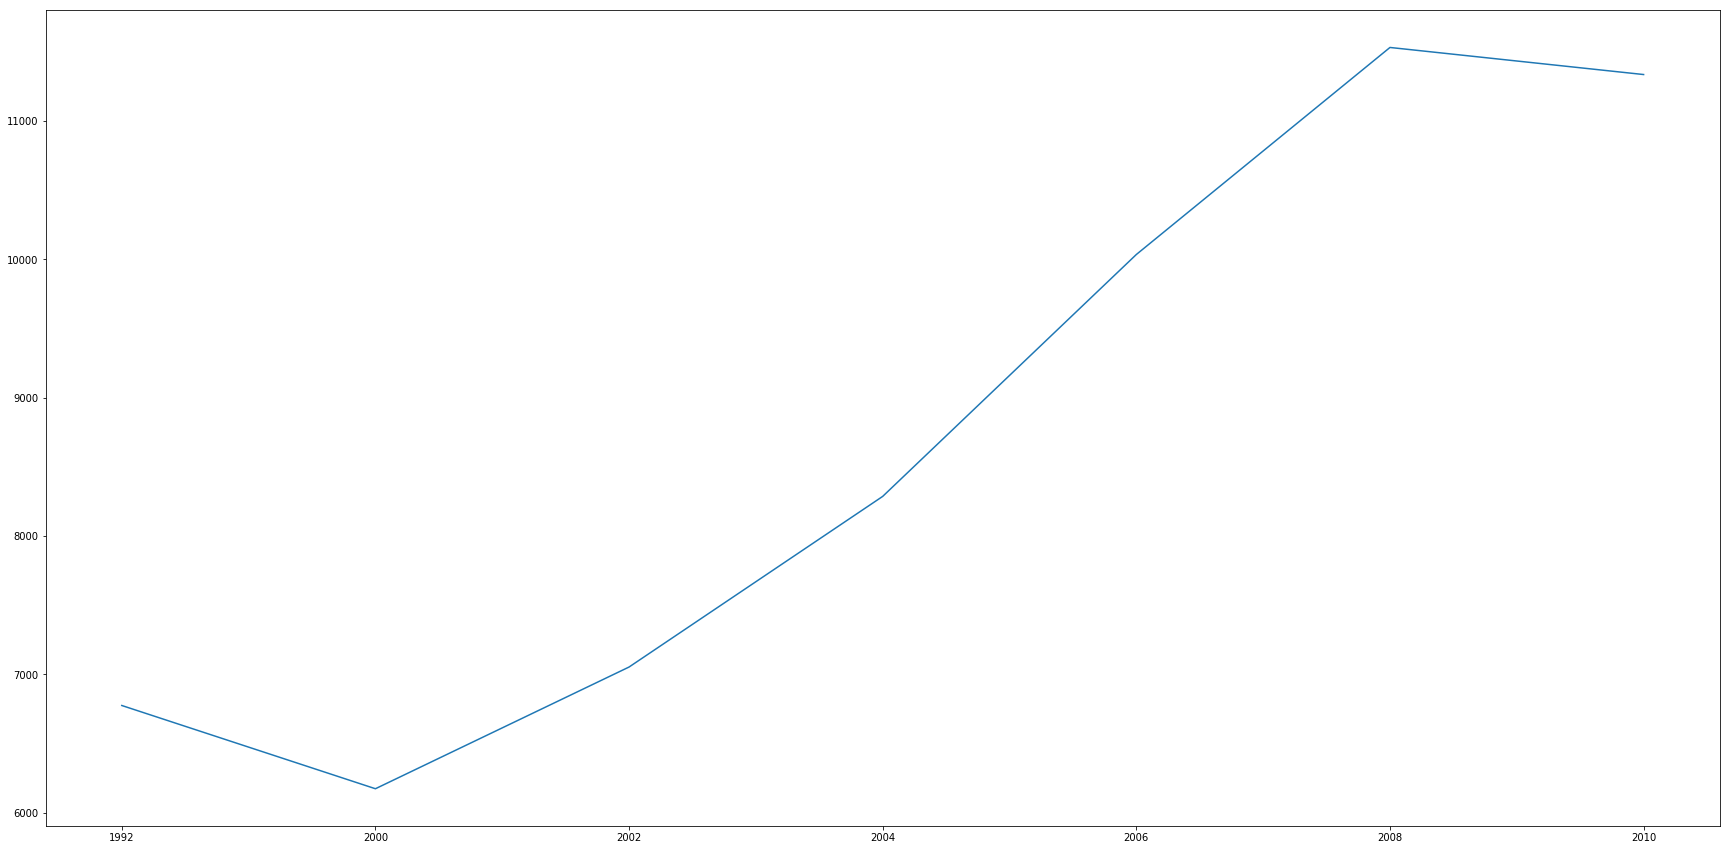

In [79]:
plt.figure(figsize=(30,15))
plt.plot(paises_GDP_URSS_2_index,paises_GDP_URSS_2_media)

In [80]:
GDP_index = renda_capita.set_index("GDP per capita")
paises = ["Armenia", "Belarus", "Estonia", "Georgia", "Kazakhstan", 
          "Kyrgyz Republic", "Lithuania", "Moldova", "Russia", "Tajikistan", 
          "Turkmenistan", "Ukraine", "Uzbekistan"] 
paises_GDP = GDP_index.loc[paises] 

Tempo = [1992,2000,2002,2004,2006,2008,2010]

paises_GDP = paises_GDP.loc[:, Tempo]
paises_GDP

,1992,2000,2002,2004,2006,2008,2010
GDP per capita,,,,,,,
Armenia,1973.0,2919.0,3654.0,4635.0,6020.0,7383.0,6508.0
Belarus,7201.0,7300.0,8144.0,9851.0,12010.0,14488.0,15703.0
Estonia,10523.0,14877.0,16974.0,19665.0,24047.0,24743.0,21710.0
Georgia,3435.0,3269.0,3664.0,4346.0,5116.0,5900.0,5938.0
Kazakhstan,10669.0,9706.0,12116.0,14365.0,17109.0,18797.0,19601.0
Kyrgyz Republic,2681.0,2075.0,2144.0,2401.0,2418.0,2791.0,2790.0
Lithuania,12629.0,12484.0,14268.0,16913.0,19923.0,23223.0,20758.0
Moldova,3822.0,2329.0,2676.0,3080.0,3487.0,3890.0,3925.0
Russia,15661.0,13173.0,14629.0,16967.0,19660.0,22506.0,21664.0


In [81]:
media_paises_GDP = paises_GDP.mean()
media_paises_GDP

1992     6806.923077
2000     6303.769231
2002     7184.076923
2004     8428.615385
2006     9983.538462
2008    11314.923077
2010    10982.153846
dtype: float64

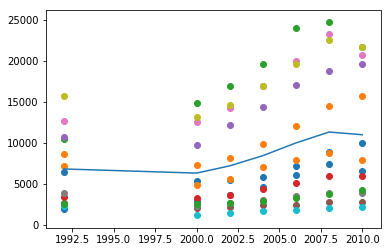

In [82]:
paises_GDP_t = paises_GDP.T

for pais in paises:
    plt.scatter(Tempo,paises_GDP_t[pais])
plt.plot(media_paises_GDP)
plt.show()

# Tabela do IDH da URSS

In [83]:
IDH_index = IDH.set_index("HDI")
paises = ["Armenia", "Belarus", "Estonia", "Georgia", "Kazakhstan", 
          "Kyrgyz Republic", "Lithuania", "Moldova", "Russia", "Tajikistan", 
          "Turkmenistan", "Ukraine", "Uzbekistan"]
paises_IDH = IDH_index.loc[paises]
paises_IDH

,1980,1990,2000,2005,2006,2007,2008,2009,2011
HDI,,,,,,,,,
Armenia,NaN,NaN,0.643,0.689,0.703,0.715,0.719,0.712,0.716
Belarus,NaN,NaN,NaN,0.723,0.731,0.738,0.744,0.746,0.756
Estonia,NaN,0.717,0.776,0.821,0.829,0.834,0.832,0.828,0.835
Georgia,NaN,NaN,NaN,0.707,0.712,0.724,0.722,0.724,0.733
Kazakhstan,NaN,NaN,0.657,0.714,0.721,0.727,0.729,0.733,0.745
Kyrgyz Republic,NaN,NaN,0.577,0.595,0.598,0.605,0.611,0.611,0.615
Lithuania,NaN,NaN,0.749,0.793,0.798,0.803,0.806,0.802,0.810
Moldova,NaN,NaN,0.586,0.631,0.637,0.638,0.644,0.638,0.649
Russia,NaN,NaN,0.691,0.725,0.733,0.742,0.748,0.747,0.755


In [84]:
Tempo = [2005,2007,2008,2009,2011]
paises_IDH = paises_IDH.loc[:, Tempo]
paises_IDH = paises_IDH.dropna(axis=0)
paises_IDH

,2005,2007,2008,2009,2011
HDI,,,,,
Armenia,0.689,0.715,0.719,0.712,0.716
Belarus,0.723,0.738,0.744,0.746,0.756
Estonia,0.821,0.834,0.832,0.828,0.835
Georgia,0.707,0.724,0.722,0.724,0.733
Kazakhstan,0.714,0.727,0.729,0.733,0.745
Kyrgyz Republic,0.595,0.605,0.611,0.611,0.615
Lithuania,0.793,0.803,0.806,0.802,0.810
Moldova,0.631,0.638,0.644,0.638,0.649
Russia,0.725,0.742,0.748,0.747,0.755


# Dispersão da média do IDH ao longo do tempo

In [85]:
media_paises_IDH = paises_IDH.mean()
media_paises_IDH

2005    0.688462
2007    0.701846
2008    0.705846
2009    0.705308
2011    0.713615
dtype: float64

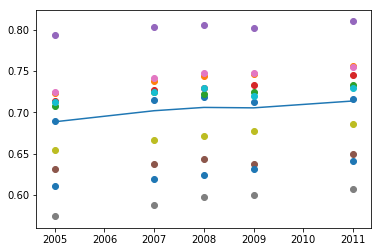

In [124]:
paises_IDH_t = paises_IDH.T

for pais in paises:
    plt.scatter(Tempo,paises_IDH_t[pais])
plt.plot(Tempo,media_paises_IDH)
plt.show()

# Análiza da dívida externa

In [148]:
divida_2 = pd.read_excel("external_debt.xlsx", sheet_name="Data")

divida_index = divida_2.set_index("External debt stocks (% of GNI)")

paises = ["Armenia", "Belarus", "Estonia", "Georgia", "Kazakhstan", 
          "Kyrgyz Republic", "Lithuania", "Moldova", "Russia", "Tajikistan", 
          "Turkmenistan", "Ukraine", "Uzbekistan"] 

paises_divida = divida_index.loc[paises]

Tempo = ["1994","1996","1998","2000","2002","2004","2006","2008","2010"]

paises_divida_URSS = paises_divida.loc[:, Tempo]

paises_divida_URSS

C:\Users\Pedro Ball\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  if __name__ == '__main__':


,1994,1996,1998,2000,2002,2004,2006,2008,2010
External debt stocks (% of GNI),,,,,,,,,
Armenia,16.303517,31.708304,41.155321,46.649018,64.601743,53.466101,30.364364,28.069928,64.762354
Belarus,8.700479,13.308168,15.785729,16.862582,19.894022,17.390757,14.383822,20.059950,46.783742
Estonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Georgia,58.724562,45.020155,43.312992,51.592763,53.961547,39.662477,29.041890,58.152930,80.436099
Kazakhstan,13.186785,14.038822,27.873832,72.970120,76.483827,81.451810,101.300709,94.164487,94.289784
Kyrgyz Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lithuania,7.215576,17.118212,31.578793,42.018923,44.134219,47.830007,63.446601,69.611537,82.950448
Moldova,29.798299,48.040095,63.412591,128.996306,101.717697,66.208358,63.980954,52.020525,73.487666
Russia,30.966559,32.714942,68.604907,63.245374,43.533605,34.031032,26.109955,24.986492,26.877448


In [153]:
media_paises_divida = paises_divida_URSS.mean()
media_paises_divida

1994    22.357689
1996    31.327480
1998    48.511571
2000    64.950569
2002    59.090610
2004    45.513010
2006    40.452147
2008    42.611649
2010    57.240694
dtype: float64

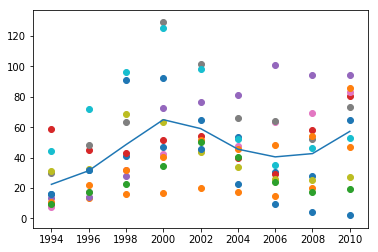

In [154]:
paises_media_t = paises_divida_URSS.T

for pais in paises:
    plt.scatter(Tempo,paises_media_t[pais])
plt.plot(Tempo,media_paises_divida)
plt.show()

# Analise do join do IDH e da dívida externa

In [158]:
comp_IDH_divida = paises_IDH.join(paises_divida_URSS, how='inner', lsuffix='', rsuffix='')
comp_IDH_divida

,2005,2007,2008,2009,2011,1994,1996,1998,2000,2002,2004,2006,2008,2010
HDI,,,,,,,,,,,,,,
Armenia,0.689,0.715,0.719,0.712,0.716,16.303517,31.708304,41.155321,46.649018,64.601743,53.466101,30.364364,28.069928,64.762354
Belarus,0.723,0.738,0.744,0.746,0.756,8.700479,13.308168,15.785729,16.862582,19.894022,17.390757,14.383822,20.059950,46.783742
Estonia,0.821,0.834,0.832,0.828,0.835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Georgia,0.707,0.724,0.722,0.724,0.733,58.724562,45.020155,43.312992,51.592763,53.961547,39.662477,29.041890,58.152930,80.436099
Kazakhstan,0.714,0.727,0.729,0.733,0.745,13.186785,14.038822,27.873832,72.970120,76.483827,81.451810,101.300709,94.164487,94.289784
Kyrgyz Republic,0.595,0.605,0.611,0.611,0.615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lithuania,0.793,0.803,0.806,0.802,0.810,7.215576,17.118212,31.578793,42.018923,44.134219,47.830007,63.446601,69.611537,82.950448
Moldova,0.631,0.638,0.644,0.638,0.649,29.798299,48.040095,63.412591,128.996306,101.717697,66.208358,63.980954,52.020525,73.487666
Russia,0.725,0.742,0.748,0.747,0.755,30.966559,32.714942,68.604907,63.245374,43.533605,34.031032,26.109955,24.986492,26.877448


# Comparação

In [165]:
renda_capita_index = renda_capita.set_index("GDP per capita")
paises = ["Finland", "Norway", "Poland", "China", "Mongolia"]
paises_vizinhos_GDP = renda_capita_index.loc[paises]

Tempo = [1992,2000,2002,2004,2006,2008,2010]

paises_vizinhos_GDP = paises_vizinhos_GDP.loc[:, Tempo]
paises_vizinhos_GDP

,1992,2000,2002,2004,2006,2008,2010
GDP per capita,,,,,,,
Finland,25726.0,34517.0,35834.0,37783.0,40115.0,42122.0,39425.0
Norway,45742.0,58699.0,60152.0,62370.0,64573.0,65216.0,62946.0
Poland,9553.0,14565.0,14964.0,16314.0,17959.0,19996.0,21328.0
China,1845.0,3678.0,4285.0,5127.0,6360.0,7880.0,9430.0
Mongolia,4132.0,4655.0,4925.0,5706.0,6480.0,7563.0,7708.0


In [167]:
media_paises_vizinhos_GDP = paises_vizinhos_GDP.mean()
media_paises_vizinhos_GDP

1992    17399.6
2000    23222.8
2002    24032.0
2004    25460.0
2006    27097.4
2008    28555.4
2010    28167.4
dtype: float64

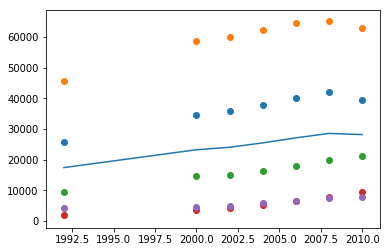

In [178]:
media_paises_vizinhos_GDP_t = paises_vizinhos_GDP.T

for pais in paises:
    plt.scatter(Tempo,media_paises_vizinhos_GDP_t[pais])
plt.plot(Tempo,media_paises_vizinhos_GDP)
plt.show()

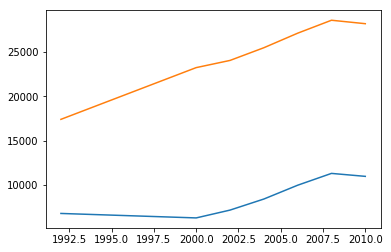

In [176]:
plt.plot(media_paises_GDP)
plt.plot(Tempo,media_paises_vizinhos_GDP)
plt.show()

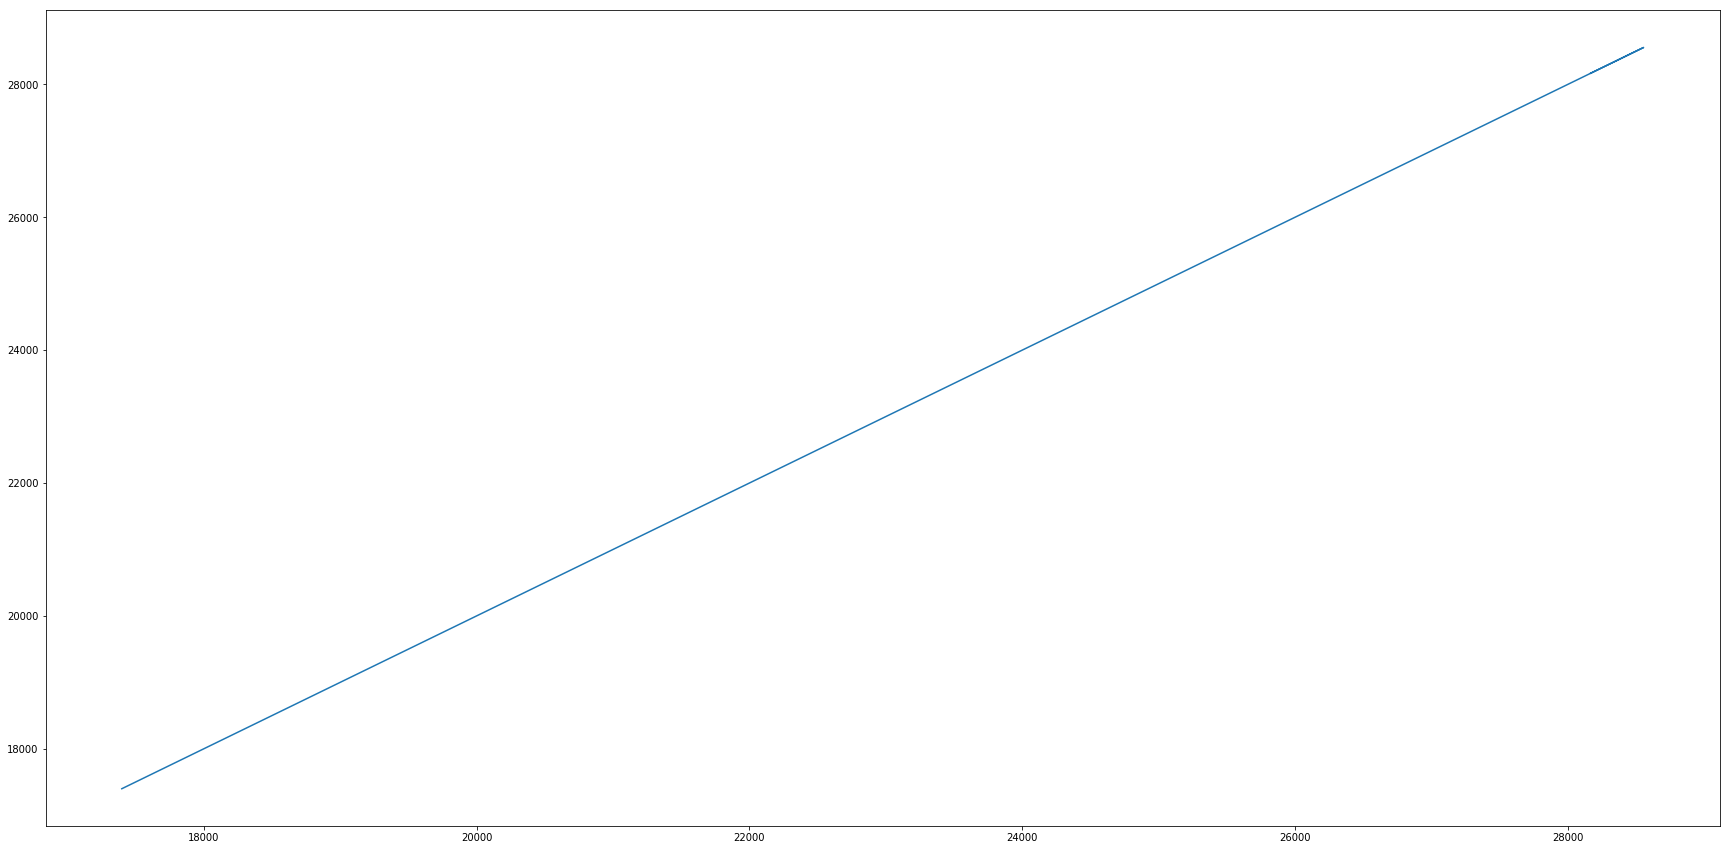

In [184]:
paises_vizinhos_GDP_index = media_paises_vizinhos_GDP
plt.figure(figsize=(30,15))
plt.plot(paises_vizinhos_GDP_index,media_paises_vizinhos_GDP)
plt.show()

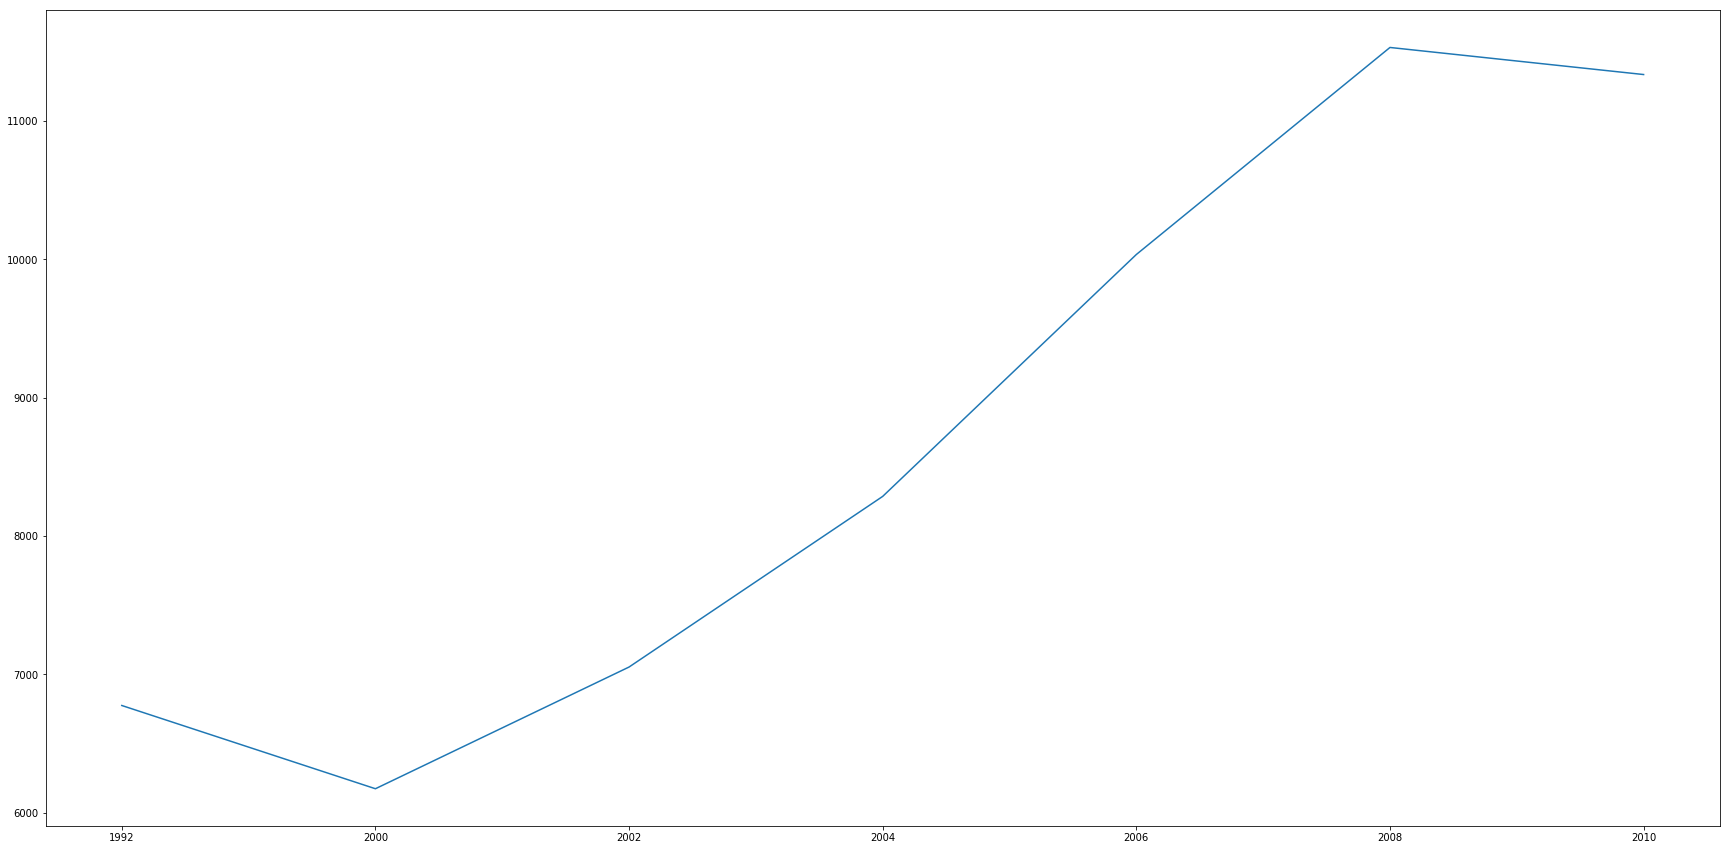

In [185]:
plt.figure(figsize=(30,15))
plt.plot(paises_GDP_URSS_2_index,paises_GDP_URSS_2_media)